# Configuracion del .pynb

In [ ]:
#!pip install detecto
!pip install git+https://github.com/alankbi/detecto
!pip install git+https://github.com/nficano/pytube
#!pip install pytesseract
!pip install easyocr

  Cloning https://github.com/alankbi/detecto to /tmp/pip-req-build-xbmuyzo9
  Running command git clone -q https://github.com/alankbi/detecto /tmp/pip-req-build-xbmuyzo9
  Created wheel for detecto: filename=detecto-1.2.1-py3-none-any.whl size=25643 sha256=3c8d54d77c63fecd099ca33c4ff83d8f500b619ed794d72eb26afcceaa04afe2
  Stored in directory: /tmp/pip-ephem-wheel-cache-7p80z7bn/wheels/4e/c9/e7/435a27ff00971b8a8fb6df4b02713a7424a3238b9470797e4c
Successfully built detecto
  Cloning https://github.com/nficano/pytube to /tmp/pip-req-build-xjgm3q9d
  Running command git clone -q https://github.com/nficano/pytube /tmp/pip-req-build-xjgm3q9d
  Created wheel for pytube: filename=pytube-11.0.1-py3-none-any.whl size=56242 sha256=1b241bc8f48adc6af78b9e5af4dada8c4c0e9f47cec178c6f7f968599d405a22
  Stored in directory: /tmp/pip-ephem-wheel-cache-s51vwbbt/wheels/68/f0/02/319083d0126c7e7fb3ac6a803bbff62f852cfd07b9371e05e4
Successfully built pytube
     |████████████████████████████████| 63.6 MB 56 kB/

In [ ]:
import tensorflow.keras
import detecto
import matplotlib.pyplot as plt
from detecto import core, utils, visualize
from detecto.utils import read_image
from detecto.core import DataLoader, Model
import numpy as np
import cv2
from cv2 import cvtColor
from pytube import YouTube
import easyocr
from skimage.io import imread
from skimage.color import rgb2gray

## Conectar el colab con drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

## Configurar el directorio de trabajo a la carpeta datasetPlates.
Crearla si no existe y poner el .pynb dentro de la carpeta

In [ ]:
import os

# TODO: Change this to your Drive folder location
# CREAR UNA CARPETA LLAMADA datasetPlates EN SU DRIVE
WORKING_DIRECTORY = '/content/gdrive/MyDrive/datasetPlates'

os.chdir(WORKING_DIRECTORY)

# Pre Procesamiento 

## Conversion de datasets (imagenes y .xml) a archivos .csv

In [ ]:
## SOLO EJECUTAR SI NO SE TIENEN LOS ARCHIVOS .CSV, TODOS LOS CSV ESTAN INCLUIDOS EN EL COMPRIMIDO NO ES NECESARIO EJECUTAR ESTO
## SI SE EJECUTA HAY Q CAMBIAR LOS VALORES DE LA COLUMNA CLASS DE train2.csv A license-plate

# PONER LOS ARCHIVOS DE ENTRENAMIENTO EN LA CARPETA datasetPlates
#data_t = utils.xml_to_csv('train/annots', 'train.csv')
#data_v = utils.xml_to_csv('valid/annots', 'val.csv')
#data_t2 = utils.xml_to_csv('annotations', 'train2.csv')

In [ ]:
#data_t

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,dayride_type1_001.mp4#t=892.jpg,1280,720,license-plate,352,470,589,531,0
1,dayride_type1_001.mp4#t=276.jpg,1280,720,license-plate,692,417,790,443,1
2,dayride_type1_001.mp4#t=1116.jpg,1280,720,license-plate,506,450,644,484,2
3,dayride_type1_001.mp4#t=281.jpg,1280,720,license-plate,955,603,1176,664,3
4,nightride_type3_001.mp4#t=7.jpg,1280,720,license-plate,693,439,942,508,4
...,...,...,...,...,...,...,...,...,...
516,dayride_type1_001.mp4#t=588.jpg,1280,720,license-plate,615,382,703,407,423
517,dayride_type1_001.mp4#t=1088.jpg,1280,720,license-plate,70,364,178,393,424
518,dayride_type1_001.mp4#t=1088.jpg,1280,720,license-plate,653,385,746,411,424
519,dayride_type1_001.mp4#t=32.jpg,1280,720,license-plate,586,358,679,380,425


## Cargar los archivos .csv

In [ ]:
dataset_t = core.Dataset('train.csv', 'train/images/')
dataset_v = core.Dataset('val.csv', 'valid/images/')
dataset_t2 = core.Dataset('train2.csv', 'images/')

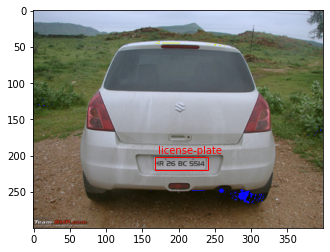

In [ ]:
from detecto.visualize import show_labeled_image

#image, targets = dataset_t[120]
image, targets = dataset_t2[10]
show_labeled_image(image, targets['boxes'], targets['labels'])

# Entrenamiento

## Dataset de github 
https://github.com/RobertLucian/license-plate-dataset

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 7
Begin iterating over training dataset


  0%|          | 0/214 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 214/214 [05:55<00:00,  1.66s/it]


Begin iterating over validation dataset


100%|██████████| 107/107 [01:11<00:00,  1.50it/s]


Loss: 0.05040767452914581
Epoch 2 of 7
Begin iterating over training dataset


100%|██████████| 214/214 [05:24<00:00,  1.52s/it]


Begin iterating over validation dataset


100%|██████████| 107/107 [00:41<00:00,  2.56it/s]


Loss: 0.04133027131347177
Epoch 3 of 7
Begin iterating over training dataset


100%|██████████| 214/214 [05:23<00:00,  1.51s/it]


Begin iterating over validation dataset


100%|██████████| 107/107 [00:41<00:00,  2.56it/s]


Loss: 0.0369311420368814
Epoch 4 of 7
Begin iterating over training dataset


100%|██████████| 214/214 [05:23<00:00,  1.51s/it]


Begin iterating over validation dataset


100%|██████████| 107/107 [00:41<00:00,  2.57it/s]


Loss: 0.031523988377651045
Epoch 5 of 7
Begin iterating over training dataset


100%|██████████| 214/214 [05:22<00:00,  1.51s/it]


Begin iterating over validation dataset


100%|██████████| 107/107 [00:41<00:00,  2.55it/s]


Loss: 0.031095438227753774
Epoch 6 of 7
Begin iterating over training dataset


100%|██████████| 214/214 [05:22<00:00,  1.51s/it]


Begin iterating over validation dataset


100%|██████████| 107/107 [00:41<00:00,  2.56it/s]


Loss: 0.031530051143996624
Epoch 7 of 7
Begin iterating over training dataset


100%|██████████| 214/214 [05:23<00:00,  1.51s/it]


Begin iterating over validation dataset


100%|██████████| 107/107 [00:42<00:00,  2.53it/s]


Loss: 0.030378236117659607


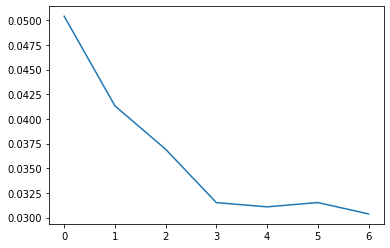

In [ ]:
model = Model(['license-plate'])
loader = DataLoader(dataset_t, batch_size=2, shuffle=True)
losses = model.fit(loader, dataset_v, epochs=7, verbose=True)
# Plot the accuracy over time
plt.plot(losses)
plt.show()

## Dataset de Kaggle
https://www.kaggle.com/andrewmvd/car-plate-detection

In [ ]:
model.fit(dataset_t2, epochs=7, verbose=True)

Epoch 1 of 7
Begin iterating over training dataset


100%|██████████| 433/433 [05:30<00:00,  1.31it/s]


Epoch 2 of 7
Begin iterating over training dataset


100%|██████████| 433/433 [05:17<00:00,  1.36it/s]


Epoch 3 of 7
Begin iterating over training dataset


100%|██████████| 433/433 [05:16<00:00,  1.37it/s]


Epoch 4 of 7
Begin iterating over training dataset


100%|██████████| 433/433 [05:20<00:00,  1.35it/s]


Epoch 5 of 7
Begin iterating over training dataset


100%|██████████| 433/433 [05:20<00:00,  1.35it/s]


Epoch 6 of 7
Begin iterating over training dataset


100%|██████████| 433/433 [05:18<00:00,  1.36it/s]


Epoch 7 of 7
Begin iterating over training dataset


100%|██████████| 433/433 [05:18<00:00,  1.36it/s]


## Si es que ya se ha guardado/exportado una version previa de un modelo cargar aca

In [ ]:
#si ya se ha exportado el modelo
model = Model.load('license_detector_v3.pth',['license-plate'])

# Pruebas de uso

## Prediccion sobre dataset de github

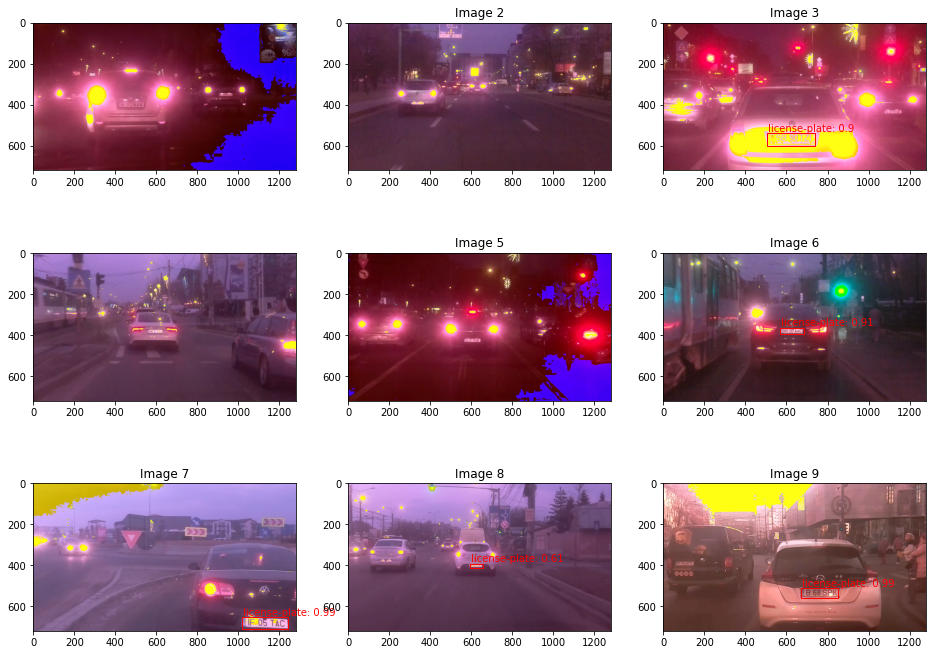

In [ ]:
images = []
# Create a list of images 0, 5, 10, ... 40 from val_dataset
for i in range(0, 45, 5):
    image, _ = dataset_v[i]
    images.append(image)

# Plot a 3x3 grid of the model's predictions on our 9 images
visualize.plot_prediction_grid(model, images, dim=(3, 3), figsize=(16, 12))

## Prediccion sobre dataset de Kaggle

In [ ]:
path = "images/Cars{}.png"
# create figure
#fig = plt.figure(figsize=(15, 10))
tests = []
for i in range(9):
    #fig.add_subplot(3, 3, i+1)
    img = imread(path.format(i*3))[:,:,:3]#read_image("images/Cars8.png")
    #img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    #print(img.shape)
    tests.append(img)
    #plt.title("Imagen " + str(i+1))
    #plt.imshow(img)
visualize.plot_prediction_grid(model, tests, dim=(3, 3), figsize=(16, 12))

## Otras imagenes de internet

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


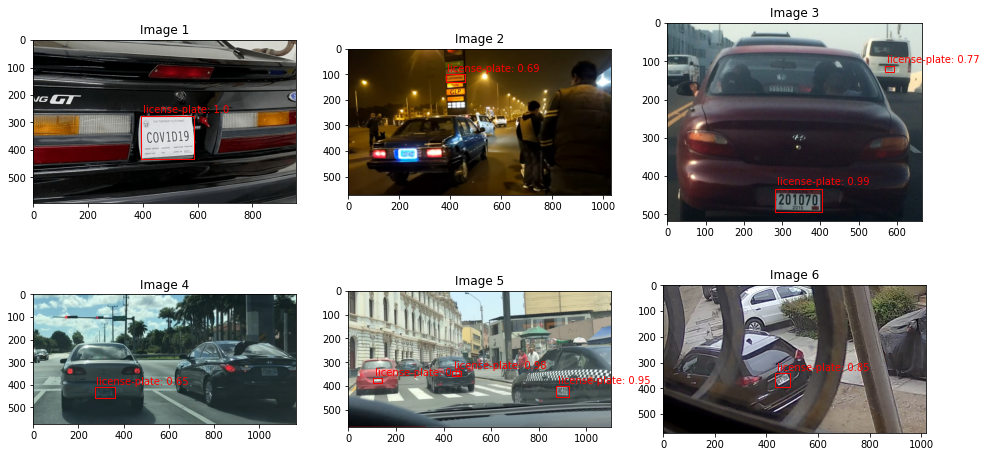

In [ ]:
path = "other/prueba{}.png"

tests1 = []
for i in range(6):
    img = imread(path.format(i+1))[:,:,:3]#read_image("images/Cars8.png")
    #img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    #print(img.shape)
    tests1.append(img)
visualize.plot_prediction_grid(model, tests1, dim=(2, 3), figsize=(16, 8))

tensor([[225.8837, 126.2018, 420.3634, 172.9990]])


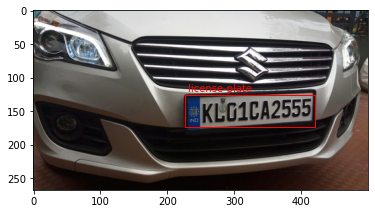

In [ ]:
from detecto.visualize import show_labeled_image

#img = imread("other/las-polemicas-placas-que-hacen.jpg")[:,:,:3]
label, box, scores = model.predict(tests[0])
print(box)
show_labeled_image(tests[0], box[0], label[0])

# Procesamiento de imagenes y extracción de texto

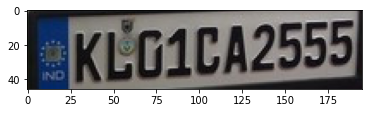

In [ ]:
from skimage.filters import gaussian
from skimage.transform import rescale

_,box,_ = model.predict(tests[0])
#print("Imagen " + str(i+1))
box = box[0].numpy()
crop = tests[0][int(box[1]):int(box[3]),int(box[0]):int(box[2]), :]
#crop = gaussian(crop, multichannel=True)
#plt.imshow(crop)
#crop = rescale(crop, 1, anti_aliasing=True, multichannel=True)
#crop = crop.mean(axis=2)
#plt.subplot(1, 2, 1)
plt.imshow(crop)

(46, 195, 3)


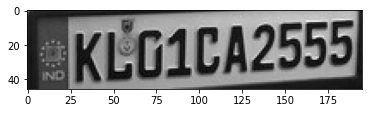

In [ ]:
cgrey = crop.copy()
print(cgrey.shape)
cgrey = cv2.cvtColor(cgrey, cv2.COLOR_BGR2GRAY)
plt.imshow(cgrey, cmap='gray')

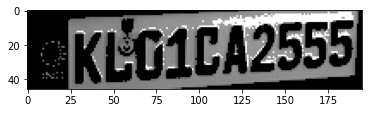

In [ ]:
cgrey[cgrey<100] = 0
cgrey[cgrey>=255-100] = 255

plt.imshow(cgrey, cmap='gray')

In [ ]:
th = []
for i in range(len(tests)):
    _,box,_ = model.predict(tests[i])
    if (len(box) > 0):
        box = box[0].numpy()
        crop = tests[i][int(box[1]):int(box[3]),int(box[0]):int(box[2]), :]
        #crop = crop.mean(axis=2)

        #plt.imshow(crop)

        cgrey = crop.copy()
        cgrey = cv2.cvtColor(cgrey, cv2.COLOR_BGR2GRAY)
        cgrey[cgrey<100] = 0
        cgrey[cgrey>=255-100] = 255
        
        th.append([cgrey,i + 1])
        #plt.imshow(cgrey)

In [ ]:
reader = easyocr.Reader(lang_list=['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
print("Imagen id: [] significa que identifico una placa pero no logro leer el contenido")
for i in range(len(th)):
    output = reader.readtext(th[i][0],detail=0)
    print("Imagen", th[i][1], ":",output)

Imagen id: [] significa que identifico una placa pero no logro leer el contenido
Imagen 1 : ['KLo1CA2555']
Imagen 2 : ['PGoMN112']
Imagen 3 : ['Ell']
Imagen 4 : ['DZI7 YXR']
Imagen 5 : ['Pui8 _', 'BES']
Imagen 6 : []
Imagen 7 : ['802 LIN', 'MAy', 'VIRGINIA', '07']
Imagen 8 : ['Ysx2/3']
Imagen 9 : ['6526 JhD']


## Guardar modelo en carpeta datasetPlates

In [ ]:
# guardar modelo en drive
model.save('license_detector_v3.pth')

# Pruebas con video
La documentacion de detecto indica que solo funciona en local. No se llego a probar. 
https://detecto.readthedocs.io/en/latest/usage/quickstart.html

In [ ]:
video = YouTube("https://www.youtube.com/watch?v=e_WBuBqS9h8") #insert your video url
print(video.title) #doesn't required
download = video.streams.filter(res="720p")
download.first().download("/content")

30 Minutes of Cars Driving By in 2009


'/content/30 Minutes of Cars Driving By in 2009.mp4'

In [ ]:
from detecto.visualize import plot_prediction_grid, detect_video, detect_live

detect_video(model, "30 Minutes of Cars Driving By in 2009.mp4", 'test.avi', fps = 20, score_filter=0.6)
#detect_live(model, score_filter=0.7)  # Note: may not work on VMs